PART 1: HOMELESSNESS IN SCHOOLS

<Figure size 1200x600 with 0 Axes>

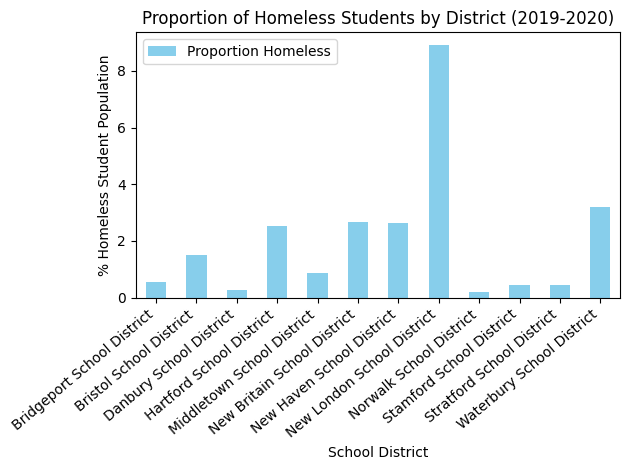

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

########
## SELECTING THE DATASET
#####
data_dir = 'datasets'
df = pd.read_csv(f'{data_dir}/School_Attendance_by_Student_Group_and_District__2021-2022.csv')

########
## EXTRACT DESIRED COLUMNS
#####
attendance_data = df[['District name', 'Student group', '2019-2020 student count']]

########
## FILTER OUT NON-CITY DISTRICTS
#####
attendance_data = attendance_data[attendance_data['District name'] != 'Connecticut']
attendance_data = attendance_data[attendance_data['District name'] != 'Connecticut Technical Education and Career System']
attendance_data = attendance_data[attendance_data['District name'] != 'Capitol Region Education Council']

########
## EXTRACT DESIRED ROWS
#####
all_students_data = attendance_data[attendance_data['Student group'] == 'All Students']
homeless_students_data = attendance_data[attendance_data['Student group'] == 'Students Experiencing Homelessness']

########
## GROUP STUDENT COUNTS BY DISTRICTS
#####
all_students_attendance = all_students_data.groupby('District name')['2019-2020 student count'].mean().reset_index()
homeless_students_attendance = homeless_students_data.groupby('District name')['2019-2020 student count'].mean().reset_index()

########
## MERGE DATAFRAMES ON DISTRICT NAME
#####
comparison_df = pd.merge(all_students_attendance, homeless_students_attendance, on='District name', suffixes=('_all_students', '_homeless_students'))

########
## CALCULATE PERCENTAGE OF HOMELESS STUDENTS
#####
comparison_df['Proportion Homeless'] = comparison_df['2019-2020 student count_homeless_students'] / comparison_df['2019-2020 student count_all_students'] * 100

########
## CREATE BAR GRAPH
#####
plt.figure(figsize=(12, 6))
comparison_df.plot(x='District name', y='Proportion Homeless', kind='bar', color='skyblue')
plt.xlabel('School District')
plt.ylabel('% Homeless Student Population')
plt.title('Proportion of Homeless Students by District (2019-2020)')
plt.xticks(rotation=40, ha='right')
plt.tight_layout()
plt.show()

PART 2: ACCIDENTAL DRUG RELATED DEATHS

C:\Users\Criti\AppData\Local\Temp\ipykernel_24112\1023156942.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_drug_data = date_filtered[age_mask]


<Figure size 1200x600 with 0 Axes>

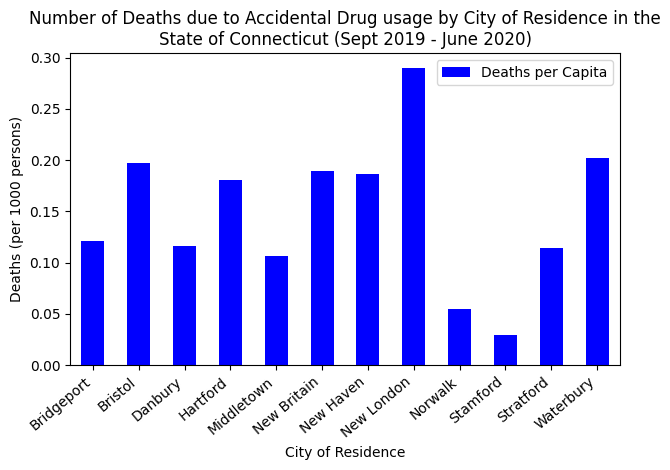

<Figure size 1200x600 with 0 Axes>

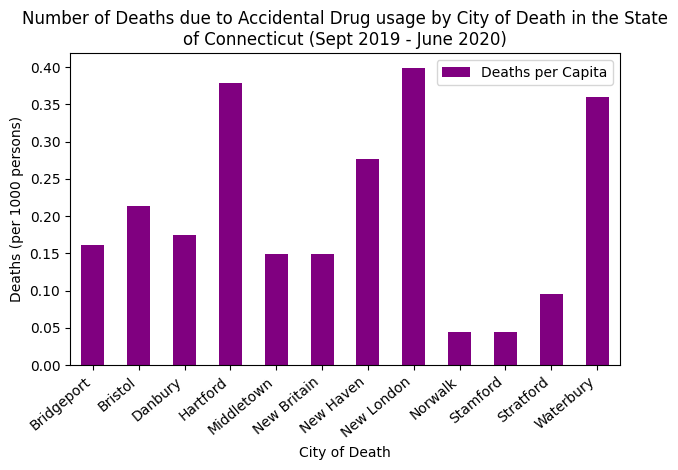

In [2]:
import textwrap

########
## SELECTING THE DATASET
#####
data_dir = 'datasets'
df_drugs = pd.read_csv(f'{data_dir}/Accidental_Drug_Related_Deaths_2012-2022.csv')
df_population = pd.read_excel(f'{data_dir}/Connecticut_DemographicsByCity_sample.xlsx')

########
## CONVERT TO DATETIME FORMAT
#####
df_drugs['Date'] = pd.to_datetime(df_drugs['Date'])

########
## CREATING MASK FOR DATES BETWEEN SEPTEMBER 1st 2019 and JUNE 6th 2020 FOR THE SCHOOL YEAR
## AS WELL AS PEOPLE OVER THE AGE OF 40, DEEMED UNRELATED
#####
date_mask = (df_drugs['Date'] >= '2019-09-01') & (df_drugs['Date'] <= '2020-06-30')
age_mask = (df_drugs['Age'] < 40)

########
## MASKING THE DATA FRAME
#####
date_filtered = df_drugs[date_mask]
filtered_drug_data = date_filtered[age_mask]

########
## EXTRACT DESIRED COLUMNS
#####
death_data = filtered_drug_data[['Residence City', 'Death City']]
population_data = df_population[['Geography', 'Best Population Estimate']]

########
## SETTING UP MASK FOR CITIES OF INTEREST
#####
cities_included = ["Bridgeport", "Bristol", "Danbury", "Hartford", "Middletown", "New Britain", "New Haven", "New London", "Norwalk", "Stamford", "Stratford", "Waterbury"]
death_cities_included = [s.upper() for s in cities_included]
pop_cities_included = [s + " town" for s in cities_included]

########
## CREATING THE MASK FOR CITIES OF INTEREST
#####
death_city_mask = death_data['Death City'].isin(death_cities_included)
res_city_mask = death_data['Residence City'].isin(death_cities_included)
population_city_mask = population_data['Geography'].isin(pop_cities_included)

########
## APPLYING THE MASK FOR CITIES OF INTEREST
#####
deaths_by_res_city = death_data[res_city_mask]
deaths_by_death_city = death_data[death_city_mask]
population_by_city = population_data[population_city_mask]

########
## REMOVING "TOWN" FROM CITY NAMES
#####
for i, s in enumerate(population_by_city['Geography']):
    population_by_city['Geography'].values[i] = s.replace(" town", "")

########
## COUNTING NUMBER OF DEATHS PER CITY
#####
res_city_death_counts = deaths_by_res_city['Residence City'].value_counts()
death_city_death_counts = deaths_by_death_city['Death City'].value_counts()

########
## CREATING DATA FRAMES TO STORE THE CITY NAMES AND DEATHS PER CAPITA
## WHICH WILL BE USED FOR GRAPHING
#####
population_by_res_city = pd.DataFrame({
    "City Names": population_by_city.sort_index()['Geography'],
    "Deaths per Capita": population_by_city.sort_index()['Best Population Estimate']
})

population_by_death_city = pd.DataFrame({
    "City Names": population_by_city.sort_index()['Geography'],
    "Deaths per Capita": population_by_city.sort_index()['Best Population Estimate']
})

########
## SORTING BY CITY NAMES
#####
res_city_death_counts = res_city_death_counts.sort_index()
death_city_death_counts = death_city_death_counts.sort_index()

########
## CALCULATING THE DEATHS PER CAPITA
#####
for i, val in enumerate(res_city_death_counts.values):
    population_by_res_city['Deaths per Capita'].values[i] = val / population_by_res_city['Deaths per Capita'].values[i] * 1000

for i, val in enumerate(death_city_death_counts.values):
    population_by_death_city['Deaths per Capita'].values[i] = val / population_by_death_city['Deaths per Capita'].values[i] * 1000

########
## BAR GRAPH FOR DEATHS BY CITY OF RESIDENCE
#####
plt.figure(figsize=(12, 6))
population_by_res_city.plot(x='City Names', y='Deaths per Capita', kind='bar', color='blue')
plt.xlabel('City of Residence')
plt.ylabel('Deaths (per 1000 persons)')
plt.title(textwrap.fill('Number of Deaths due to Accidental Drug usage by City of Residence in the State of Connecticut (Sept 2019 - June 2020)', width=75))
plt.xticks(rotation=40, ha='right')
plt.tight_layout()

########
## BAR GRAPH FOR DEATHS BY CITY OF DEATH
#####
plt.figure(figsize=(12, 6))
population_by_death_city.plot(x='City Names', y='Deaths per Capita', kind='bar', color='purple')
plt.xlabel('City of Death')
plt.ylabel('Deaths (per 1000 persons)')
plt.title(textwrap.fill('Number of Deaths due to Accidental Drug usage by City of Death in the State of Connecticut (Sept 2019 - June 2020)', width=75))
plt.xticks(rotation=40, ha='right')
plt.tight_layout()

plt.show()

PART 3: PREDICTIVE MODEL

<Figure size 1200x600 with 0 Axes>

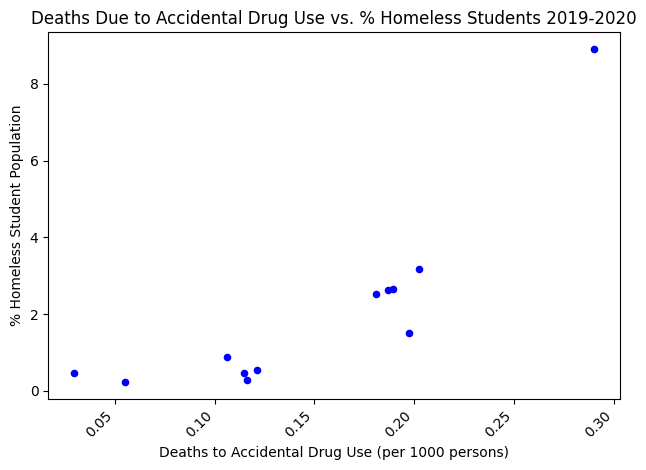

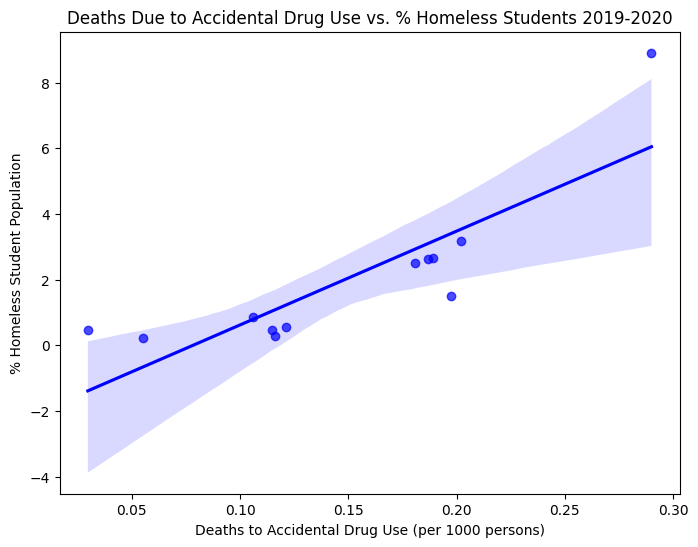

Slope: 28.5666
R-value (correlation coefficient): 0.8480
P-value: 0.0005
Standard Error: 5.6457
R-squared: 0.7191


<Figure size 1200x600 with 0 Axes>

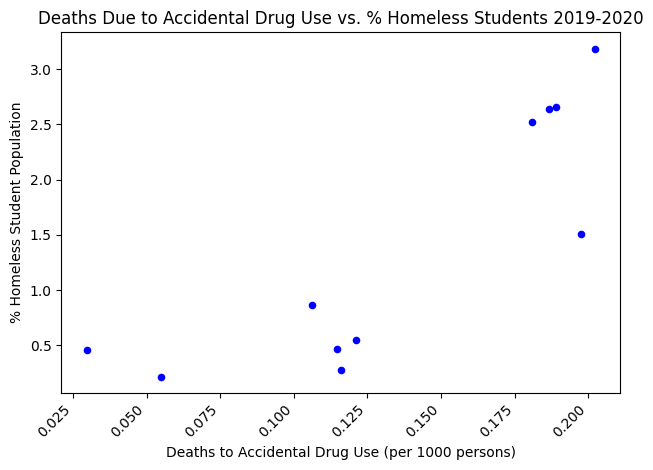

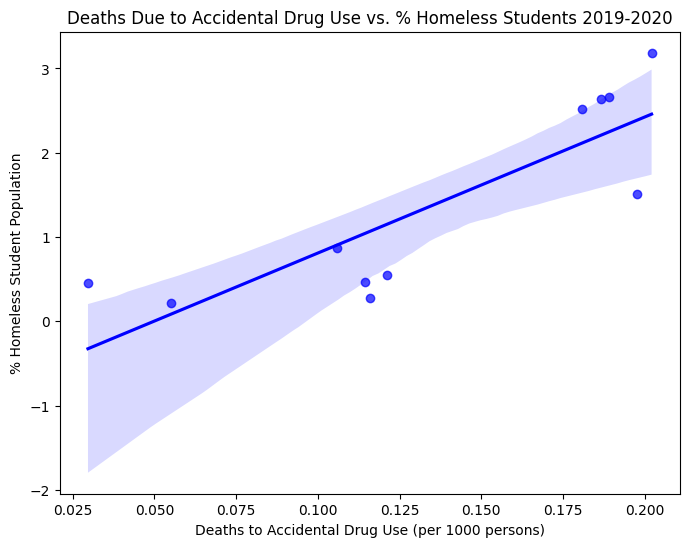

Slope: 16.1376
R-value (correlation coefficient): 0.8424
P-value: 0.0011
Standard Error: 3.4415
R-squared: 0.7096


In [4]:
import seaborn as sns
from scipy.stats import linregress

########
## FUNCTION TO PRINT THE RELEVANT STATISTICS OF A DATAFRAME
## USING LINREGRESS OBJECT FROM SCIPY.STATS AS AN INPUT
#####
def printStats(result):
    slope = result.slope
    r_value = result.rvalue
    p_value = result.pvalue
    std_err = result.stderr
    r_squared = r_value ** 2

    # Display the statistical values
    print(f"Slope: {slope:.4f}")
    print(f"R-value (correlation coefficient): {r_value:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Standard Error: {std_err:.4f}")
    print(f"R-squared: {r_squared:.4f}")

########
## EXTRACT DESIRED COLUMNS FROM PART 1
#####
student_df = comparison_df[['District name', 'Proportion Homeless']]
for i, s in enumerate(student_df['District name']):
    student_df['District name'].values[i] = s.replace(" School District", "")

########
## USE DEATHS BY CITY OF RESIDENCE FROM PART 2
#####
drugs_df = population_by_res_city

########
## MERGE DATAFRAMES ON CITY NAME
#####
df_combined = pd.merge(student_df, drugs_df, left_on='District name', right_on='City Names', how='inner')
df_combined = df_combined.drop('City Names', axis=1)

df_combined['Proportion Homeless'] = pd.to_numeric(df_combined['Proportion Homeless'], errors='coerce')
df_combined['Deaths per Capita'] = pd.to_numeric(df_combined['Deaths per Capita'], errors='coerce')

##
## SCATTERPLOT (NO REGRESSION)
##

plt.figure(figsize=(12, 6))
df_combined.plot(x='Deaths per Capita', y='Proportion Homeless', kind='scatter', color='blue')
plt.xlabel('Deaths to Accidental Drug Use (per 1000 persons)')
plt.ylabel('% Homeless Student Population')
plt.title('Deaths Due to Accidental Drug Use vs. % Homeless Students 2019-2020')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##
## SCATTERPLOT (WITH REGRESSION)
##

plt.figure(figsize=(8, 6))
sns.regplot(x='Deaths per Capita', y='Proportion Homeless', data=df_combined, scatter_kws={'alpha':0.7}, color='blue')
plt.xlabel('Deaths to Accidental Drug Use (per 1000 persons)')
plt.ylabel('% Homeless Student Population')
plt.title('Deaths Due to Accidental Drug Use vs. % Homeless Students 2019-2020')
plt.show()

########
## PRINT STATS USING LINREGRESS
#####
printStats(linregress(df_combined['Deaths per Capita'], df_combined['Proportion Homeless']))

########
## REMOVING THE OUTLIER
#####
df_combined = df_combined[df_combined['District name'] != 'New London']

##
## SCATTERPLOT (NO REGRESSION) WITH OUTLIER REMOVED
##

plt.figure(figsize=(12, 6))
df_combined.plot(x='Deaths per Capita', y='Proportion Homeless', kind='scatter', color='blue')
plt.xlabel('Deaths to Accidental Drug Use (per 1000 persons)')
plt.ylabel('% Homeless Student Population')
plt.title('Deaths Due to Accidental Drug Use vs. % Homeless Students 2019-2020')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##
## SCATTERPLOT (WITH REGRESSION) WITH OUTLIER REMOVED
##

plt.figure(figsize=(8, 6))
sns.regplot(x='Deaths per Capita', y='Proportion Homeless', data=df_combined, scatter_kws={'alpha':0.7}, color='blue')
plt.xlabel('Deaths to Accidental Drug Use (per 1000 persons)')
plt.ylabel('% Homeless Student Population')
plt.title('Deaths Due to Accidental Drug Use vs. % Homeless Students 2019-2020')
plt.show()

########
## PRINT STATS USING LINREGRESS
#####
printStats(linregress(df_combined['Deaths per Capita'], df_combined['Proportion Homeless']))
